In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, recall_score, precision_score, f1_score
from sklearn.pipeline import Pipeline

## 1 is ProRevenge 0 is MaliciousCompliance

In [152]:
df_cleaned = pd.read_csv('../data/remove_removed.csv')
feature_importance = pd.read_csv('../data/feature_importance.csv')

df_title = df_cleaned[['title', 'subreddit']]

MC_title = df_title[df_title['subreddit'] == 0]
PR_title = df_title[df_title['subreddit'] == 1]

X = df_title['title']
y = df_title['subreddit']

In [38]:
cv = CountVectorizer(ngram_range = (1,2), stop_words = 'english')

In [39]:
MCwords = pd.DataFrame(cv.fit_transform(MC_title['title']).toarray(), columns = cv.get_feature_names_out())
PRwords = pd.DataFrame(cv.fit_transform(PR_title['title']).toarray(), columns = cv.get_feature_names_out())

In [43]:
MC_15 = MCwords.sum().sort_values(ascending = False).head(15)

In [44]:
PR_15 = PRwords.sum().sort_values(ascending = False).head(15)

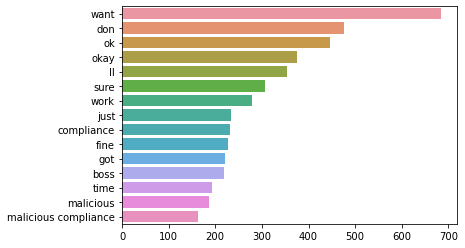

In [98]:
sns.barplot(x = MC_15.values, y = MC_15.index);

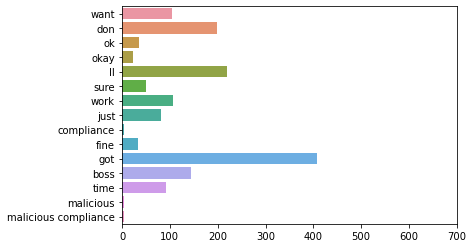

In [88]:
sns.barplot(x = PRwords[MC_15.index].sum(), y = MC_15.index);
plt.xlim([0, 700]);

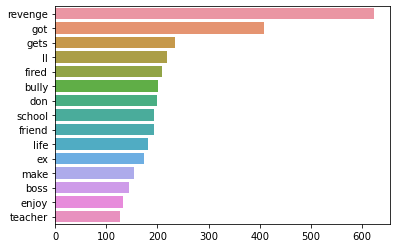

In [89]:
sns.barplot(x = PR_15.values, y = PR_15.index);

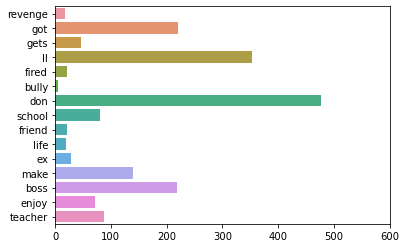

In [90]:
sns.barplot(x = MCwords[PR_15.index].sum(), y = PR_15.index);
plt.xlim([0, 600]);

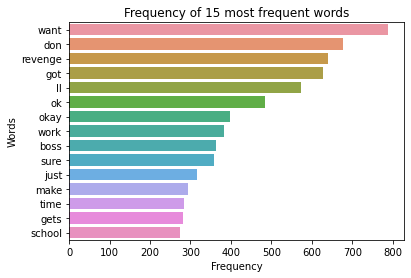

In [155]:
Allwords = pd.DataFrame(cv.fit_transform(X).toarray(), columns = cv.get_feature_names_out())
Allwords15 = Allwords.sum().sort_values(ascending = False).head(15)
sns.barplot(x = Allwords15.values, 
            y = Allwords15.index).set(title = 'Frequency of 15 most frequent words',
                                     ylabel = 'Words',
                                     xlabel = 'Frequency');
plt.savefig('../visuals/15mostfrequent.png')

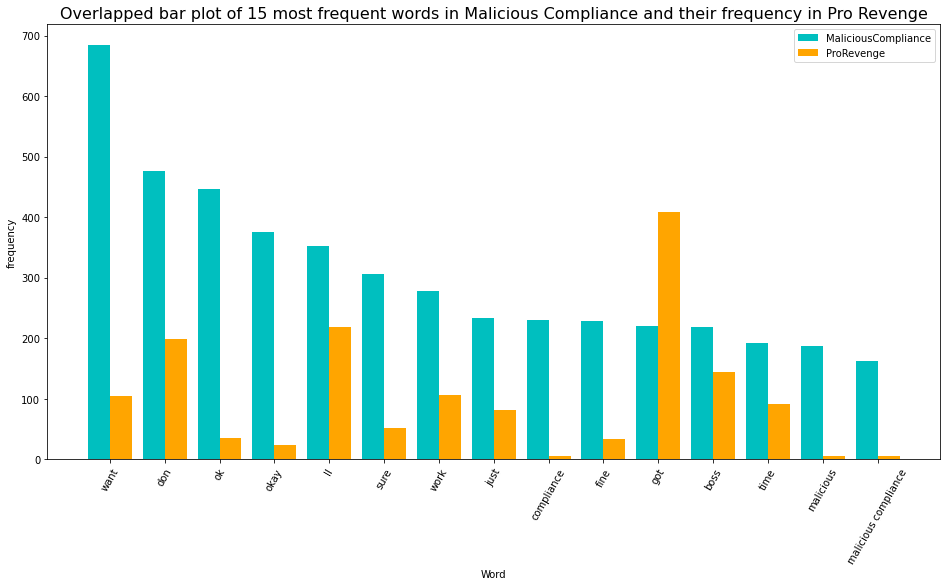

In [150]:
x = np.arange(len(MC_15.index))
width = 0.4

plt.figure(figsize = (16, 8))
plt.bar(x - width/2, MC_15.values, width, color = 'c')
plt.bar(x + width/2, PRwords[MC_15.index].sum(), width,  color = 'orange')
plt.xticks(ticks = x, labels = MC_15.index, rotation = 60)
plt.title('Overlapped bar plot of 15 most frequent words in Malicious Compliance and their frequency in Pro Revenge',
         fontsize = 16);
plt.xlabel('Word')
plt.ylabel('frequency')
plt.legend(['MaliciousCompliance', 'ProRevenge'])
plt.savefig('../visuals/MCvsPRGroupedbar.png');

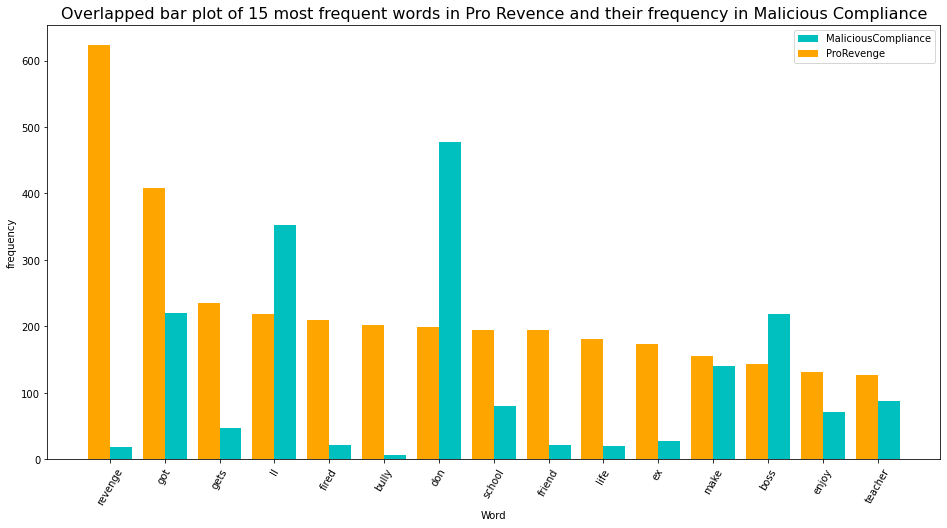

In [151]:
plt.figure(figsize = (16, 8))
plt.bar(x + width/2, MCwords[PR_15.index].sum(), width, color = 'c')
plt.bar(x - width/2, PR_15.values, width, color = 'orange')
plt.xticks(ticks = x, labels = PR_15.index, rotation = 60)
plt.title('Overlapped bar plot of 15 most frequent words in Pro Revence and their frequency in Malicious Compliance', 
          fontsize = 16);
plt.xlabel('Word')
plt.ylabel('frequency')
plt.legend(['MaliciousCompliance', 'ProRevenge'])
plt.savefig('../visuals/PRvsMCGroupedbar.png');

In [156]:
feature_importance.head(15)

,Variable,Importance
0,revenge,0.012902
1,compliance,0.004593
2,malicious,0.003808
3,malicious compliance,0.003719
4,friends,0.002742
5,asshole,0.002156
6,friend,0.001937
7,pro revenge,0.001631
8,manager,0.001568
9,pro,0.001509


/Users/danielsun/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


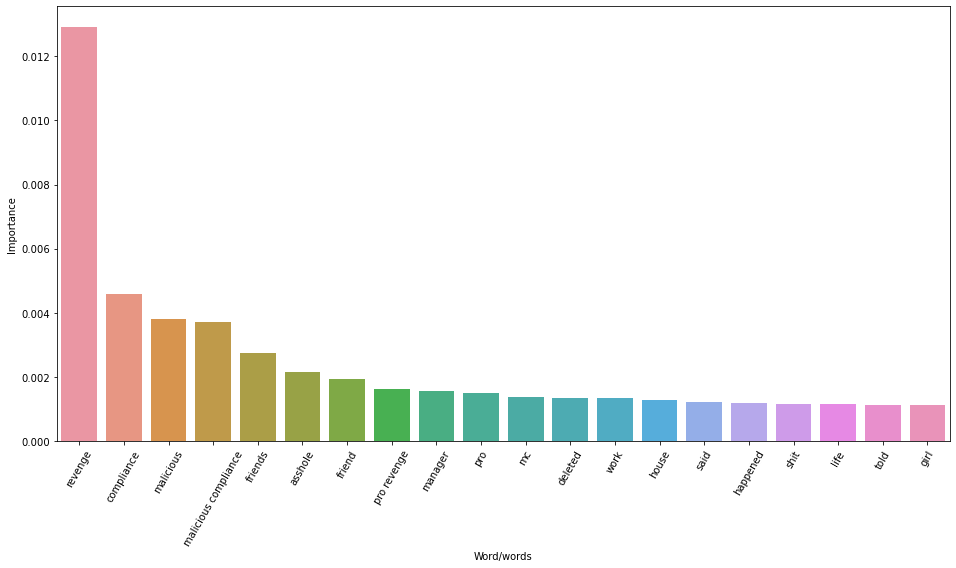

In [167]:
plt.figure(figsize = (16, 8))
sns.barplot(feature_importance['Variable'].head(20), feature_importance['Importance'].head(20))
plt.xticks(rotation = 60)
plt.xlabel('Word/words');